<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%204/Assignment_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Third iteration

In this iteration we focus on decreasing overfitting to improve the validation accuracy. We implement the following 2 changes:

1. Batch normalization
2. Dropout

Adding batch normalization slightly increasing the number of params from 7,778 to 8,154 ( about +300 ). However the number of trainable parameters increases to only 7966 ( +200 ). The validation accuracy in this iteration increases to 99.31% which is close to the target 99.4%. We also see that the gap between the training and the validation accuracy decreases in this iteration. This means the measures put in to decrease overfitting are effective.

### Why only these 2 changes?

In the previous 2 iterations we observed that while the training accuracy was well over 99% the validation accuracy lagged behind barely getting to 99%. This is a clear case of overfitting. Also during the training process in many epochs, often even though training loss decreased the validation loss increased. While this isnt necessarily diretly indicative of overfitting, it does share some symptoms with the same. We want to put in basic features to cull overfitting before adding other things like LR scheduler, changing batch size, tweaking the optimizer etc.


### High level stats:

Total number of params: 8,154
<br>Total number of trainable params: 7,966
<br>Validation accuracy: 99.31%
<br>Training accuracy: 99.58%


# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Installing Keras and importing into current runtime environment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Importing libraries and functions required for the program

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading the MNIST dataset. Note that this dataset comes with a ready made train and test set.

(60000, 28, 28)


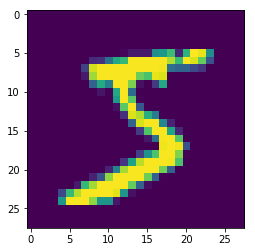

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Visualizing the first training image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshaping images from 28x28 to 28x28x1. This change needs to be done since convolution expects a 3 dimensional matrix.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bringing the values of pixels to 0-255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Checking out the first ten labels on the training set. Note that these are numbers at this point. More importantly these numbers have an ordinality amongst them

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the numerical labels to categorical values. This is important since the classes 0-9 are just different classes and have no inherent order amongst them ( i.e 7 is not a lesser class than 8 in any way with respect to digit classification )

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Seeing the categorical representation of the labels for the first ten training images

In [10]:
from keras.layers import Activation, BatchNormalization, Dropout
dropout_rate = 0.1


model = Sequential()

# Convolution block 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) #3x3x1x10 kernel - 26x26x10 image - Receptive Field 3x3
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x10x16 kernel - 24x24x16 image - Receptive Field 5x5
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 12x12x16 image - Receptive Field 10x10
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 12x12x8 image - Receptive Field 10x10
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x8x16 kernel - 10x10x16 image - Receptive Field 12x12
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 8x8x16 image - Receptive Field 14x14
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

# Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer - 4x4x16 image - Receptive Field 28x28
model.add(Convolution2D(10, (1,1), activation='relu')) # 1x1x16x8 kernel - 4x4x10 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

#Convolution block
model.add(Convolution2D(16, (3, 3), activation='relu')) # 3x3x16x16 kernel - 2x2x16 image - Receptive Field 28x28
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Convolution2D(10, (2, 2))) # 2x2x16x10 kernel - 1x1x10 image

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Added batch normalization and dropout after every convolution layer except the last. In the last layer dropout doesnt make sense since all the outputs are required for classification. Also the softmax performs the function of batch normalization, hence further normalization is not only not required but would also be detrimental.

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Compiling the model for training

In [13]:
from keras.callbacks import ModelCheckpoint
filepath="weights.iter3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint]

model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks = callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 45s 747us/step - loss: 0.3958 - acc: 0.8783 - val_loss: 0.0759 - val_acc: 0.9765

Epoch 00001: val_acc improved from -inf to 0.97650, saving model to weights.iter3.best.hdf5
Epoch 2/30
60000/60000 [==============================] - 40s 660us/step - loss: 0.1113 - acc: 0.9662 - val_loss: 0.0581 - val_acc: 0.9810

Epoch 00002: val_acc improved from 0.97650 to 0.98100, saving model to weights.iter3.best.hdf5
Epoch 3/30
60000/60000 [==============================] - 41s 688us/step - loss: 0.0850 - acc: 0.9735 - val_loss: 0.0488 - val_acc: 0.9847

Epoch 00003: val_acc improved from 0.98100 to 0.98470, saving model to weights.iter3.best.hdf5
Epoch 4/30
60000/60000 [==============================] - 39s 644us/step - loss: 0.0718 - acc: 0.9783 - val_loss: 0.0380 - val_acc: 0.9870

Epoch 00004: val_acc improved from 0.98470 to 0.98700, savin

After 30 epochs, the max validation accuracy reached was 99.31%. This is not only close to our target of 99.4% but also a very good validation accuracy in general.

In [0]:
model.load_weights("weights.iter3.best.hdf5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loading the best model weights ( according to validation accuracty ) stored during the training phase

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Evaluate the model on the testing dataset

In [16]:
print(score)

[0.022502157384279416, 0.9931]


Printing the score of the model on the testing dataset. The first number is the value of the loss function. The latter is the test accuracy.

In [17]:
model.evaluate(X_train, Y_train, verbose=0)

[0.013936993314657593, 0.9958]

Evaluating the model on the training dataset to see what the achieved training accuracy is.

In [0]:
y_pred = model.predict(X_test)

Computing the predicted classifications for the testing dataset

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[8.0395024e-11 2.2204777e-07 3.3418697e-08 2.9487416e-07 9.3010849e-10
  5.7870206e-09 2.2186328e-12 9.9999928e-01 3.6366232e-10 7.5506385e-08]
 [2.0120019e-04 1.5429204e-04 9.9959224e-01 4.6745322e-07 4.5939919e-07
  9.9598179e-09 3.6667003e-05 3.1440347e-06 1.1545457e-05 2.3920084e-08]
 [2.2605731e-07 9.9993289e-01 1.6399857e-06 4.4738030e-08 2.3515142e-05
  8.6331136e-07 3.8619319e-07 3.9077873e-05 1.8492521e-07 1.1187763e-06]
 [9.9981958e-01 1.8943945e-08 2.2414248e-07 3.5598288e-07 1.1439892e-07
  2.1960206e-07 1.5972512e-04 1.8375107e-07 5.2377045e-06 1.4383380e-05]
 [3.2721605e-08 2.7938736e-07 5.4116816e-07 1.0831743e-08 9.9923468e-01
  1.4884148e-08 1.4637775e-08 1.4094447e-06 3.8448715e-07 7.6274172e-04]
 [1.1406171e-07 9.9993265e-01 1.0215329e-06 6.7783716e-09 1.9709321e-05
  3.1920104e-07 8.4080504e-08 4.4282497e-05 1.2112096e-07 1.6958031e-06]
 [7.5451972e-08 3.2743247e-04 1.0820502e-04 1.0170563e-06 9.9552709e-01
  1.9263668e-06 1.4344278e-07 2.6872204e-04 2.6200530e-03 

Comparing the labels computed by our model and that given in the dataset.

Note that for the first element, the target label in the dataset is 11. The output by the model, is in the categorical form described earlier. One can see that first output peaks at index 8 which corresponds to the digit 7.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Copying the layers in a dict for visualization in the next step

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

Predefined function for visualizing how an image is processed by a particular layer in the network.

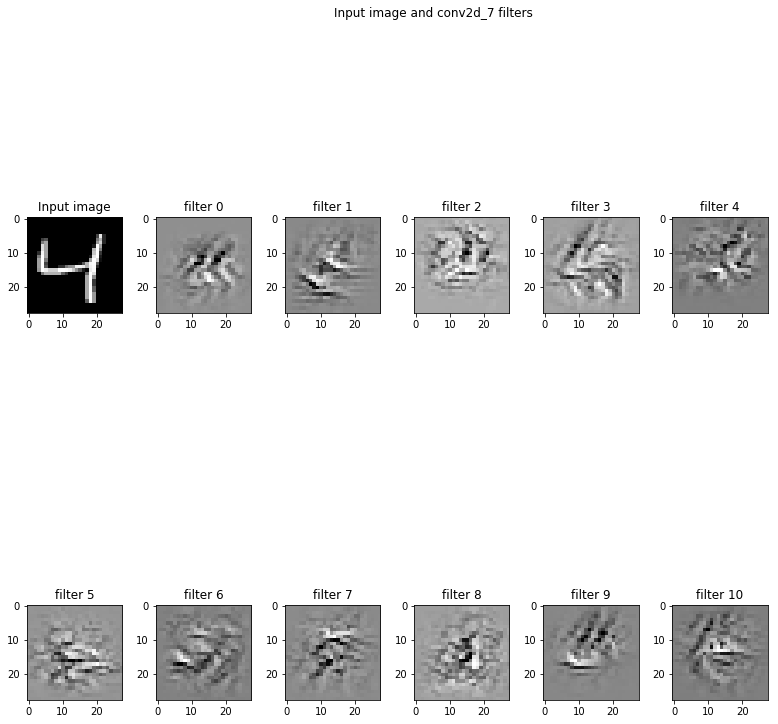

In [22]:
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_7')

Visualization of the 7th convolution layer ( 3x3x10x32 kernel ). One can see that the exact input image itself shows up in many kernels. This is surprising. I currently dont understand the significance of it